In [12]:
import wandb
from pprint import pprint

import gym
import d4rl
import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import lfilter

from tqdm.notebook import tqdm

## Wandbからrunを取得

In [2]:
model_name = 'gpt2'
env_name = 'halfcheetah'
seed = 42

path = 'st46/decision-transformer'
api = wandb.Api()
runs = api.runs(
    path=path,
    filters={'state':'finished'}
    )

for run in runs:
    if run.name == f'gym-experiment-{env_name}-medium-{model_name}-{seed}':
        break

## runからreturnを取得

In [3]:
if env_name == 'hopper':
    rtg_conditioning = 3600
elif env_name == 'halfcheetah':
    rtg_conditioning = 6000
elif env_name == 'walker2d':
    rtg_conditioning = 5000
else:
    rtg_conditioning = None

return_map = {}
return_map['medium'] = max(run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'])
best_checkpoint_epoch = np.argmax(run.history()[f'evaluation/target_{rtg_conditioning}_return_mean']) + 1

## RandomとExpertの結果を取得

In [4]:
datasets = ["random", "expert"]

for dataset in datasets:

    if env_name == "hopper":
        env = gym.make("Hopper-v3")
        max_ep_len = 1000
        env_targets = [3600, 1800]  # evaluation conditioning targets
        scale = 1000.0  # normalization for rewards/returns
    elif env_name == "halfcheetah":
        env = gym.make("HalfCheetah-v3")
        max_ep_len = 1000
        env_targets = [12000, 6000]
        scale = 1000.0
    elif env_name == "walker2d":
        env = gym.make("Walker2d-v3")
        max_ep_len = 1000
        env_targets = [5000, 2500]
        scale = 1000.0
    elif env_name == "reacher2d":
        from decision_transformer.envs.reacher_2d import Reacher2dEnv

        env = Reacher2dEnv()
        max_ep_len = 100
        env_targets = [76, 40]
        scale = 10.0
    else:
        raise NotImplementedError

    state_dim = env.observation_space.shape[0]
    act_dim = env.action_space.shape[0]

    # load dataset
    dataset_path = f"../data/{env_name}-{dataset}-v2.pkl"
    with open(dataset_path, "rb") as f:
        trajectories = pickle.load(f)

    # save all path information into separate lists
    mode = "normal"
    states, traj_lens, returns = [], [], []
    for path in trajectories:
        if mode == "delayed":  # delayed: all rewards moved to end of trajectory
            path["rewards"][-1] = path["rewards"].sum()
            path["rewards"][:-1] = 0.0
        states.append(path["observations"])
        traj_lens.append(len(path["observations"]))
        returns.append(path["rewards"].sum())
    traj_lens, returns = np.array(traj_lens), np.array(returns)

    # used for input normalization
    states = np.concatenate(states, axis=0)
    state_mean, state_std = np.mean(states, axis=0), np.std(states, axis=0) + 1e-6

    num_timesteps = sum(traj_lens)

    print("=" * 50)
    print(f"Starting new experiment: {env_name} {dataset}")
    print(f"{len(traj_lens)} trajectories, {num_timesteps} timesteps found")
    print(f"Average return: {np.mean(returns):.2f}, std: {np.std(returns):.2f}")
    print(f"Max return: {np.max(returns):.2f}, min: {np.min(returns):.2f}")
    print("=" * 50)
    
    if dataset == 'random':
        return_map['random'] = np.mean(returns)
    elif dataset == 'expert':
        return_map['expert'] = np.mean(returns)

Starting new experiment: walker2d random
48907 trajectories, 999997 timesteps found
Average return: 1.87, std: 5.81
Max return: 75.03, min: -17.01
Starting new experiment: walker2d expert
1000 trajectories, 999214 timesteps found
Average return: 4920.51, std: 136.39
Max return: 5011.69, min: 763.42


## 結果の表示

In [5]:
pprint(f'{model_name}-{env_name}-{seed}')
pprint(return_map)
normalized_score = 100 * (return_map['medium'] - return_map['random']) / (return_map['expert'] - return_map['random'])
print(f'Epoch: {best_checkpoint_epoch}')
print(f'Normalized Score: {normalized_score}')

'dt-walker2d-42'
{'expert': 4920.507, 'medium': 3469.4657257963486, 'random': 1.871351}
Epoch: 25
Normalized Score: 70.49911603099315


## Context

In [60]:
model_name = 'gpt2'
env_name = 'halfcheetah'
seed = 42

path = 'st46/decision-transformer'
api = wandb.Api()
runs = api.runs(
    path=path,
    filters={'state':'finished'}
    )

for run in runs:
    if run.name == f'gym-experiment-{env_name}-medium-{model_name}-{seed}-K1':
        break

In [61]:
if env_name == 'hopper':
    rtg_conditioning = 3600
elif env_name == 'halfcheetah':
    rtg_conditioning = 6000
elif env_name == 'walker2d':
    rtg_conditioning = 5000
else:
    rtg_conditioning = None

return_map = {}
return_map['medium'] = max(run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'])
best_checkpoint_epoch = np.argmax(run.history()[f'evaluation/target_{rtg_conditioning}_return_mean']) + 1

KeyError: 'evaluation/target_6000_return_mean'

In [64]:
datasets = ["random", "expert"]

for dataset in datasets:

    if env_name == "hopper":
        env = gym.make("Hopper-v3")
        max_ep_len = 1000
        env_targets = [3600, 1800]  # evaluation conditioning targets
        scale = 1000.0  # normalization for rewards/returns
    elif env_name == "halfcheetah":
        env = gym.make("HalfCheetah-v3")
        max_ep_len = 1000
        env_targets = [12000, 6000]
        scale = 1000.0
    elif env_name == "walker2d":
        env = gym.make("Walker2d-v3")
        max_ep_len = 1000
        env_targets = [5000, 2500]
        scale = 1000.0
    elif env_name == "reacher2d":
        from decision_transformer.envs.reacher_2d import Reacher2dEnv

        env = Reacher2dEnv()
        max_ep_len = 100
        env_targets = [76, 40]
        scale = 10.0
    else:
        raise NotImplementedError

    state_dim = env.observation_space.shape[0]
    act_dim = env.action_space.shape[0]

    # load dataset
    dataset_path = f"../data/{env_name}-{dataset}-v2.pkl"
    with open(dataset_path, "rb") as f:
        trajectories = pickle.load(f)

    # save all path information into separate lists
    mode = "normal"
    states, traj_lens, returns = [], [], []
    for path in trajectories:
        if mode == "delayed":  # delayed: all rewards moved to end of trajectory
            path["rewards"][-1] = path["rewards"].sum()
            path["rewards"][:-1] = 0.0
        states.append(path["observations"])
        traj_lens.append(len(path["observations"]))
        returns.append(path["rewards"].sum())
    traj_lens, returns = np.array(traj_lens), np.array(returns)

    # used for input normalization
    states = np.concatenate(states, axis=0)
    state_mean, state_std = np.mean(states, axis=0), np.std(states, axis=0) + 1e-6

    num_timesteps = sum(traj_lens)

    print("=" * 50)
    print(f"Starting new experiment: {env_name} {dataset}")
    print(f"{len(traj_lens)} trajectories, {num_timesteps} timesteps found")
    print(f"Average return: {np.mean(returns):.2f}, std: {np.std(returns):.2f}")
    print(f"Max return: {np.max(returns):.2f}, min: {np.min(returns):.2f}")
    print("=" * 50)
    
    if dataset == 'random':
        return_map['random'] = np.mean(returns)
    elif dataset == 'expert':
        return_map['expert'] = np.mean(returns)

Starting new experiment: halfcheetah random
1000 trajectories, 1000000 timesteps found
Average return: -288.80, std: 80.43
Max return: -85.36, min: -525.96
Starting new experiment: halfcheetah expert
1000 trajectories, 1000000 timesteps found
Average return: 10656.43, std: 441.68
Max return: 11252.04, min: 2045.83


In [65]:
pprint(f'{model_name}-{env_name}')
pprint(return_map)
normalized_score = 100 * (return_map['medium'] - return_map['random']) / (return_map['expert'] - return_map['random'])
print(f'Epoch: {best_checkpoint_epoch}')
print(f'Normalized Score: {normalized_score}')

'gpt2-halfcheetah'
{'expert': 10656.426, 'random': -288.79712}


KeyError: 'medium'

# Training Dynamics

In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.6, {"lines.linewidth": 2})

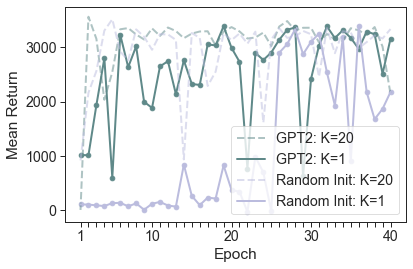

In [3]:
# plt.figure(figsize=(12, 4))
env_name = 'walker2d'
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    return_mean_K1 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean']

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666':
            break

    return_mean_K20 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean']

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2: K=1'
        label_K20 = 'GPT2: K=20'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Random Init: K=1'
        label_K20 = 'Random Init: K=20'
    else:
        color = None

    plt.plot(return_mean_K20, color=color, label=label_K20, linestyle='dashed', alpha=0.5)

    plt.plot(return_mean_K1, color=color, label=label_K1)
    plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) if (i % 10 == 0) or (i == 1) else ' ' for i in range(1, 41)]
plt.xticks(ticks=np.arange(0, 40), labels=labels)
plt.legend(loc='lower right')
# plt.title('Time Development of Mean Return')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/returnmean_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

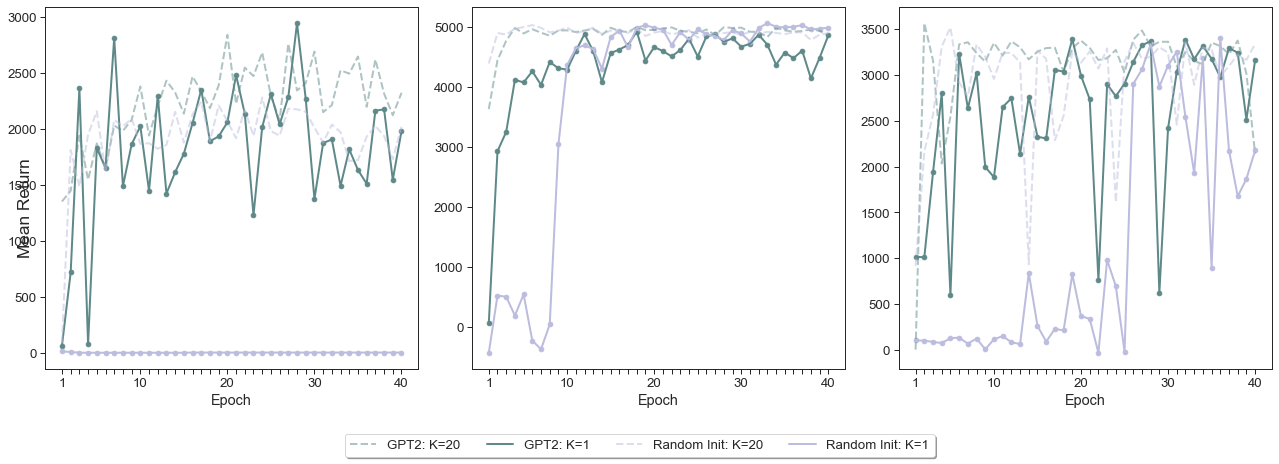

In [26]:
# plt.figure(figsize=(12, 4))
env_name_list = ['hopper', 'halfcheetah', 'walker2d']
model_name_list = ['gpt2', 'dt']
ticks_labels = [str(i) if (i % 10 == 0) or (i == 1) else "" for i in range(1, 41)]

colors = [(0.372, 0.537, 0.537), (0.627, 0.352, 0.470), (0.733, 0.737, 0.870)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.subplots_adjust(bottom=0.1)
for i, ax in enumerate(axes):

    env_name = env_name_list[i]

    for model_name in model_name_list:

        path = 'st46/decision-transformer'
        api = wandb.Api()
        runs = api.runs(
            path=path,
            filters={'state':'finished'}
            )

        if env_name == 'hopper':
            rtg_conditioning = 3600
        elif env_name == 'halfcheetah':
            rtg_conditioning = 6000
        elif env_name == 'walker2d':
            rtg_conditioning = 5000
        else:
            rtg_conditioning = None

        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
                break

        return_mean_K1 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean']

        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666':
                break

        return_mean_K20 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean']

        if model_name == 'gpt2':
            color = (0.372, 0.537, 0.537)
            label_K1 = 'GPT2: K=1'
            label_K20 = 'GPT2: K=20'
        elif model_name == 'dt':
            color = (0.733, 0.737, 0.870)
            label_K1 = 'Random Init: K=1'
            label_K20 = 'Random Init: K=20'
        else:
            color = None

        ax.plot(return_mean_K20, color=color, label=label_K20, linestyle='dashed', alpha=0.5)

        ax.plot(return_mean_K1, color=color, label=label_K1)
        ax.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

    # plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
    # labels = [i for i in range(1, 41)]
    ax.set_xticks(np.arange(0, 40)) 
    ax.set_xticklabels(ticks_labels)
    ax.set_xlabel('Epoch')

fig.tight_layout()
# fig.subplots_adjust(vspace=0.15)
fig.supylabel('Mean Return')
lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01),
          fancybox=True, shadow=True, ncol=4)

# plt.savefig(f'figs/returnmean_gpt2_dt_K1_hopper_halfcheetah_walker2d_medium_666.pdf')
plt.show()
    

# blockごとにshuffle

In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

sns.set_palette("hls", 24)

def ema(x, alpha):
    zi = [x[0]] # seed the filter state with first value
    # filter can process blocks of continuous data if <zi> is maintained
    y, zi = lfilter([1.-alpha], [1., -alpha], x, zi=zi)
    return y

  0%|          | 0/12 [00:00<?, ?it/s]

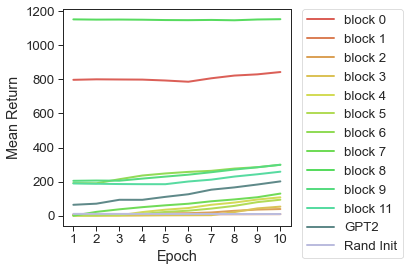

In [5]:
sns.set_palette("hls", 12)
# plt.figure(figsize=(12, 4))
env_name = 'hopper'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-dt-666-K1-block{block_id}':
            break

    return_mean_K1_block = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][:10]
    np.save(f'results/returnmean_dt_K1_block{block_id}_{env_name}_medium_666.npy', return_mean_K1_block)

    # if model_name == 'gpt2':
    #     color = (0.372, 0.537, 0.537)
    #     label_K1 = 'GPT2: K=1'
    # elif model_name == 'dt':
    #     color = (0.733, 0.737, 0.870)
    #     label_K1 = 'Random Init: K=1'
    # else:
    #     color = None

    plt.plot(ema(return_mean_K1_block, 0.99), label=f'block {block_id}')
    # plt.scatter(np.arange(len(return_mean_K1_block)), return_mean_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    return_mean_K1 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][:10]
    np.save(f'results/returnmean_{model_name}_K1_{env_name}_medium_666.npy', return_mean_K1)

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(return_mean_K1, 0.99), color=color, label=label_K1)
    # plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 11)]
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/returnmean_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

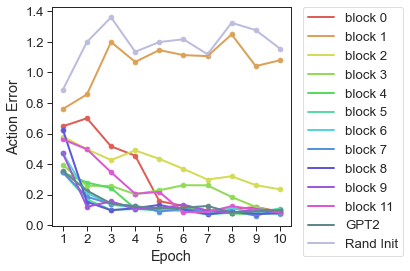

In [56]:
sns.set_palette("hls", 12)
# plt.figure(figsize=(12, 4))
env_name = 'hopper'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):
    if block_id == 10:
        pass
    else:

        path = 'st46/decision-transformer'
        api = wandb.Api()
        runs = api.runs(
            path=path
            )


        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-dt-666-K1-block{block_id}':
                break

        return_mean_K1_block = run.history()[f'training/action_error'][:10]
        np.save(f'results/actionerror_dt_K1_block{block_id}_{env_name}_medium_666.npy', return_mean_K1_block)

        # if model_name == 'gpt2':
        #     color = (0.372, 0.537, 0.537)
        #     label_K1 = 'GPT2: K=1'
        # elif model_name == 'dt':
        #     color = (0.733, 0.737, 0.870)
        #     label_K1 = 'Random Init: K=1'
        # else:
        #     color = None

        # plt.plot(ema(return_mean_K1_block, 0.99), label=f'block {block_id}')
        plt.plot(return_mean_K1_block, label=f'block {block_id}')
        plt.scatter(np.arange(len(return_mean_K1_block)), return_mean_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )


    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    return_mean_K1 = run.history()[f'training/action_error'][:10]
    np.save(f'results/actionerror_{model_name}_K1_{env_name}_medium_666.npy', return_mean_K1)

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    # plt.plot(ema(return_mean_K1, 0.99), color=color, label=label_K1)
    plt.plot(return_mean_K1, color=color, label=label_K1)
    plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 11)]
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Action Error')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/actionerror_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

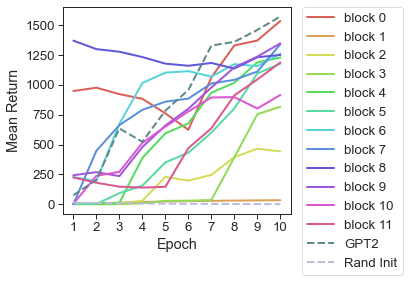

In [7]:
sns.set_palette("hls", 12)  # hls, Spectral_R

# plt.figure(figsize=(12, 4))
env_name = 'hopper'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):

    return_mean_K1_block = np.load(f'results/returnmean_dt_K1_block{block_id}_{env_name}_medium_666.npy')

    plt.plot(ema(return_mean_K1_block, 0.8), label=f'block {block_id}')
    # plt.plot(return_mean_K1_block, label=f'block {block_id}')
    # plt.scatter(np.arange(len(return_mean_K1_block)), return_mean_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    return_mean_K1 = np.load(f'results/returnmean_{model_name}_K1_{env_name}_medium_666.npy')

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(return_mean_K1, 0.8), color=color, label=label_K1, linestyle="dashed")
    # plt.plot(return_mean_K1, color=color, label=label_K1)
    # plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 11)]
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/returnmean_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

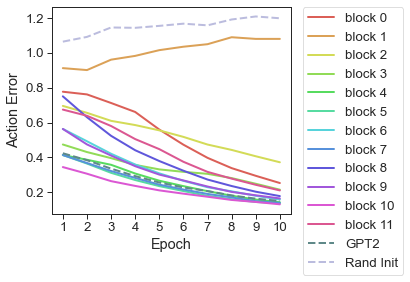

In [27]:
sns.set_palette("hls", 12)  # hls, Spectral_R

# plt.figure(figsize=(12, 4))
env_name = 'hopper'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):

    action_error_K1_block = np.load(f'results/actionerror_dt_K1_block{block_id}_{env_name}_medium_666.npy')

    plt.plot(ema(action_error_K1_block, 0.8), label=f'block {block_id}')
    # plt.plot(action_error_K1_block, label=f'block {block_id}')
    # plt.scatter(np.arange(len(action_error_K1_block)), action_error_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    action_error_K1 = np.load(f'results/actionerror_{model_name}_K1_{env_name}_medium_666.npy')

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(action_error_K1, 0.8), color=color, label=label_K1, linestyle="dashed")
    # plt.plot(action_error_K1, color=color, label=label_K1, linestyle="dashed")
    # plt.scatter(np.arange(len(action_error_K1)), action_error_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 11)]
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Action Error')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig(f'figs/actionerror_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

In [ ]:
sns.set_palette("hls", 12)  # hls, Spectral_R

# plt.figure(figsize=(12, 4))
env_name = 'hopper'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):
    if block_id == 10:
        pass
    else:
        return_mean_K1_block = np.load(f'results/returnmean_dt_K1_block{block_id}_{env_name}_medium_666.npy')

        plt.plot(ema(return_mean_K1_block, 0.8), label=f'block {block_id}')
        # plt.plot(return_mean_K1_block, label=f'block {block_id}')
        # plt.scatter(np.arange(len(return_mean_K1_block)), return_mean_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    return_mean_K1 = np.load(f'results/returnmean_{model_name}_K1_{env_name}_medium_666.npy')

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(return_mean_K1, 0.8), color=color, label=label_K1, linestyle="dashed")
    # plt.plot(return_mean_K1, color=color, label=label_K1)
    # plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 11)]
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/returnmean_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

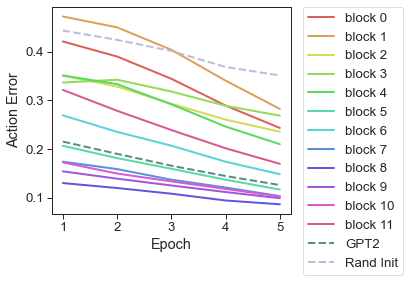

In [31]:
sns.set_palette("hls", 12)
# plt.figure(figsize=(12, 4))
env_name = 'halfcheetah'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):
    if block_id == 0 | block_id == 1 | block_id == 2 | block_id == 3 | block_id == 6:
        pass
    else:

        path = 'st46/decision-transformer'
        api = wandb.Api()
        runs = api.runs(
            path=path
            )


        for run in runs:
            if run.name == f'gym-experiment-{env_name}-medium-dt-666-K1-block{block_id}':
                break

        action_error_K1_block = run.history()[f'training/action_error'][:5]
        np.save(f'results/actionerror_dt_K1_block{block_id}_{env_name}_medium_666.npy', action_error_K1_block)

        # if model_name == 'gpt2':
        #     color = (0.372, 0.537, 0.537)
        #     label_K1 = 'GPT2: K=1'
        # elif model_name == 'dt':
        #     color = (0.733, 0.737, 0.870)
        #     label_K1 = 'Random Init: K=1'
        # else:
        #     color = None

        plt.plot(ema(action_error_K1_block, 0.8), label=f'block {block_id}')
        # plt.plot(action_error_K1_block, label=f'block {block_id}')
        # plt.scatter(np.arange(len(action_error_K1_block)), action_error_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )


    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    action_error_K1 = run.history()[f'training/action_error'][:5]
    np.save(f'results/actionerror_{model_name}_K1_{env_name}_medium_666.npy', action_error_K1)

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(action_error_K1, 0.8), color=color, label=label_K1, linestyle='dashed')
    # plt.plot(action_error_K1, color=color, label=label_K1, linestyle='dashed')
    # plt.scatter(np.arange(len(action_error_K1)), action_error_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 6)]
plt.xticks(ticks=np.arange(0, 5), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Action Error')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/actionerror_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

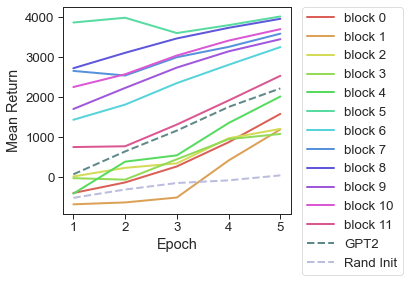

In [29]:
sns.set_palette("hls", 12)
# plt.figure(figsize=(12, 4))
env_name = 'halfcheetah'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-dt-666-K1-block{block_id}':
            break

    return_mean_K1_block = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][:5]
    np.save(f'results/returnmean_dt_K1_block{block_id}_{env_name}_medium_666.npy', return_mean_K1_block)

    # if model_name == 'gpt2':
    #     color = (0.372, 0.537, 0.537)
    #     label_K1 = 'GPT2: K=1'
    # elif model_name == 'dt':
    #     color = (0.733, 0.737, 0.870)
    #     label_K1 = 'Random Init: K=1'
    # else:
    #     color = None

    plt.plot(ema(return_mean_K1_block, 0.8), label=f'block {block_id}')
    # plt.scatter(np.arange(len(return_mean_K1_block)), return_mean_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    return_mean_K1 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][:5]
    np.save(f'results/returnmean_{model_name}_K1_{env_name}_medium_666.npy', return_mean_K1)

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(return_mean_K1, 0.8), color=color, label=label_K1, linestyle='dashed')
    # plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 6)]
plt.xticks(ticks=np.arange(0, 5), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/returnmean_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

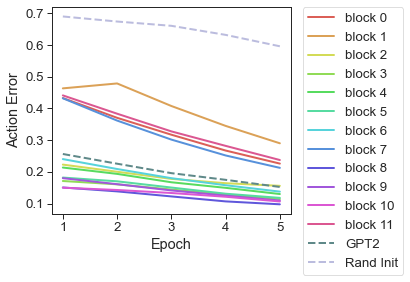

In [13]:
sns.set_palette("hls", 12)
# plt.figure(figsize=(12, 4))
env_name = 'walker2d'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path
        )


    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-dt-666-K1-block{block_id}':
            break

    action_error_K1_block = run.history()[f'training/action_error'][:5]
    np.save(f'results/actionerror_dt_K1_block{block_id}_{env_name}_medium_666.npy', action_error_K1_block)

    # if model_name == 'gpt2':
    #     color = (0.372, 0.537, 0.537)
    #     label_K1 = 'GPT2: K=1'
    # elif model_name == 'dt':
    #     color = (0.733, 0.737, 0.870)
    #     label_K1 = 'Random Init: K=1'
    # else:
    #     color = None

    # plt.plot(ema(return_mean_K1_block, 0.99), label=f'block {block_id}')
    plt.plot(ema(action_error_K1_block, 0.8), label=f'block {block_id}')
    # plt.scatter(np.arange(len(action_error_K1_block)), action_error_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )


    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    action_error_K1 = run.history()[f'training/action_error'][:5]
    # np.save(f'results/actionerror_{model_name}_K1_{env_name}_medium_666.npy', return_mean_K1)

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    # plt.plot(ema(return_mean_K1, 0.99), color=color, label=label_K1)
    plt.plot(ema(action_error_K1, 0.8), color=color, label=label_K1, linestyle='dashed')
    # plt.scatter(np.arange(len(action_error_K1)), action_error_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 6)]
plt.xticks(ticks=np.arange(0, 5), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Action Error')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/actionerror_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    

  0%|          | 0/12 [00:00<?, ?it/s]

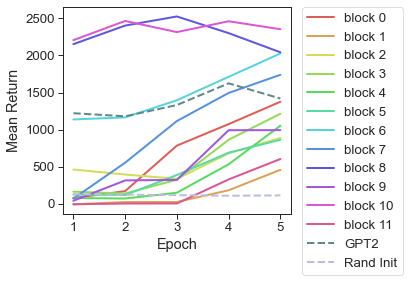

In [16]:
sns.set_palette("hls", 12)
# plt.figure(figsize=(12, 4))
env_name = 'walker2d'
block_id_list = np.arange(12)

# K=1 blockの描画
for block_id in tqdm(block_id_list):

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-dt-666-K1-block{block_id}':
            break

    return_mean_K1_block = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][:5]
    np.save(f'results/returnmean_dt_K1_block{block_id}_{env_name}_medium_666.npy', return_mean_K1_block)

    # if model_name == 'gpt2':
    #     color = (0.372, 0.537, 0.537)
    #     label_K1 = 'GPT2: K=1'
    # elif model_name == 'dt':
    #     color = (0.733, 0.737, 0.870)
    #     label_K1 = 'Random Init: K=1'
    # else:
    #     color = None

    plt.plot(ema(return_mean_K1_block, 0.8), label=f'block {block_id}')
    # plt.scatter(np.arange(len(return_mean_K1_block)), return_mean_K1_block)


# K=1の描画
model_name_list = ['gpt2', 'dt']

for model_name in model_name_list:

    path = 'st46/decision-transformer'
    api = wandb.Api()
    runs = api.runs(
        path=path,
        filters={'state':'finished'}
        )

    if env_name == 'hopper':
        rtg_conditioning = 3600
    elif env_name == 'halfcheetah':
        rtg_conditioning = 6000
    elif env_name == 'walker2d':
        rtg_conditioning = 5000
    else:
        rtg_conditioning = None

    for run in runs:
        if run.name == f'gym-experiment-{env_name}-medium-{model_name}-666-K1':
            break

    return_mean_K1 = run.history()[f'evaluation/target_{rtg_conditioning}_return_mean'][:5]
    np.save(f'results/returnmean_{model_name}_K1_{env_name}_medium_666.npy', return_mean_K1)

    if model_name == 'gpt2':
        color = (0.372, 0.537, 0.537)
        label_K1 = 'GPT2'
    elif model_name == 'dt':
        color = (0.733, 0.737, 0.870)
        label_K1 = 'Rand Init'
    else:
        color = None

    plt.plot(ema(return_mean_K1, 0.8), color=color, label=label_K1, linestyle='dashed')
    # plt.scatter(np.arange(len(return_mean_K1)), return_mean_K1, color=color)

# plt.xticks(ticks=np.arange(0, 40), labels=np.arange(1, 41))
# labels = [i for i in range(1, 41)]
labels = [str(i) for i in range(1, 6)]
plt.xticks(ticks=np.arange(0, 5), labels=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title('Time Development of Mean Return')
plt.ylabel('Mean Return')
plt.xlabel('Epoch')
plt.tight_layout()
plt.savefig(f'figs/returnmean_block_gpt2_dt_K1_{env_name}_medium_666.pdf')
plt.show()
    